In [1]:
import cirq
import math

In [2]:
circuit = cirq.Circuit()

In [3]:
(q0, q1, q2, q3, q4) = cirq.LineQubit.range(5)

In [4]:
qubits = (q0, q1, q2, q3, q4)

In [5]:
circuit.append([cirq.H(x)for x in qubits])

In [6]:
circuit.append([cirq.CNOT(q0,q1), cirq.CNOT(q1,q2), cirq.CNOT(q2,q3), cirq.CNOT(q3,q4)])

In [7]:
circuit.append([cirq.SWAP(q0,q4)])

In [8]:
rotation = cirq.XPowGate(exponent=math.pi/2)

In [9]:
circuit.append([rotation(x) for x in qubits])

In [10]:
print(circuit)

                                        ┌─────────┐
0: ───H───@──────────────────────────────×────────────X^(-3/7)───
          │                              │
1: ───H───X───@───X^(-3/7)───────────────┼───────────────────────
              │                          │
2: ───H───────X───@──────────X^(-3/7)────┼───────────────────────
                  │                      │
3: ───H───────────X──────────@───────────┼X^(-3/7)───────────────
                             │           │
4: ───H──────────────────────X───────────×────────────X^(-3/7)───
                                        └─────────┘


In [11]:
from cirq import Simulator

In [12]:
q_r = cirq.LineQubit(0)
rotation_gate = cirq.rx(math.pi / 1800)
probabilities = []

num_degrees = 180
counter = num_degrees * 10 + 1
simulation_rounds = 1000

for i in range(counter):
    rotation_circuit = cirq.Circuit()
    for _ in range(i):
        rotation_circuit.append(rotation_gate(q_r))
    rotation_circuit.append(cirq.measure(q_r))
    simulator = Simulator()
    result = simulator.run(rotation_circuit, repetitions=simulation_rounds)
    prob = result.histogram(key='0')[0]/simulation_rounds
    probabilities.append(prob)
    if i%100 == 0:
        print(f"Total rotation: {i/10} degrees \t Probability of measuring the state in the |0⟩ state: {prob}")

Total rotation: 0.0 degrees 	 Probability of measuring the state in the |0⟩ state: 1.0
Total rotation: 10.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.992
Total rotation: 20.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.973
Total rotation: 30.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.923
Total rotation: 40.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.868
Total rotation: 50.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.838
Total rotation: 60.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.745
Total rotation: 70.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.659
Total rotation: 80.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.574
Total rotation: 90.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.522
Total rotation: 100.0 degrees 	 Probability of measuring the state in the |0⟩ state: 0.439
Total rotati

In [13]:
from matplotlib import pyplot as plt

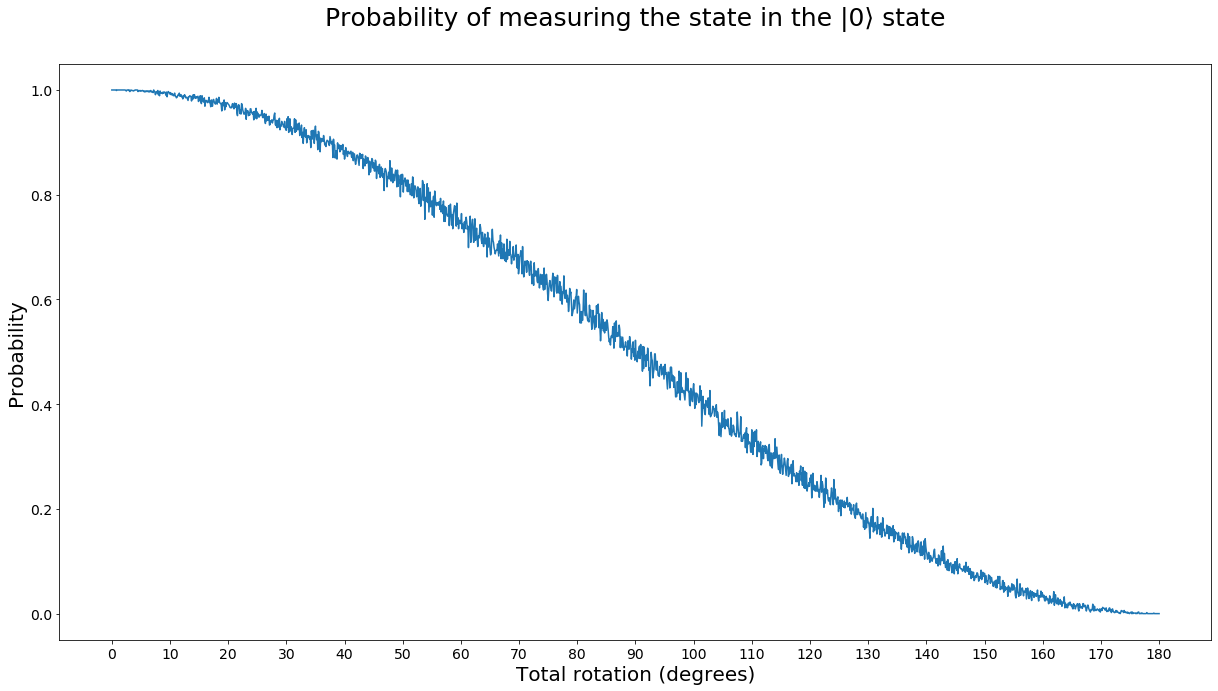

In [37]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = [round(0.1*x) for x in range(0, counter, 100)]
x_pos = [x for x in range(0,counter,100)]
ax.plot(probabilities)

fig.suptitle('Probability of measuring the state in the |0⟩ state', fontsize=25)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_xlabel('Total rotation (degrees)', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()